# Wealth Transfer Model using AgentPy

This simple model serves as a tutorial to create a simple agent-based model with AgentPy. It demonstrates how to create a basic model with a custom agent type, run a simulation, record data and visualize results.

In [4]:
# Import libraries.

# Model design.
import agentpy as ap
import numpy as np

# Visualization.
import seaborn as sns

## About the Model

This model explores the distribution of wealth under a trading population of agents. Each agent starts with one unit of wealth. During each timestep, each agent with positive wealth randomly selects a trading partner and gives them one unit of their wealth. This random interaction will create an inequality of wealth that follows a Boltsmann distribution.

## Model Definition

We start by defining a new type of `Agent` with the following methods:

- `setup()` is called automatically when a new agent is created and initializes a variable `wealth`.
- `wealth_transfer()` describes the agent's behavior at every timestep and will be called by the model.



In [5]:
class WealthAgent(ap.Agent):
    """ An agent with wealth. """

    def setup(self):

        self.wealth = 1

    def wealth_transfer(self):

        if self.wealth > 0:

            partner = self.model.agents.random()
            partner.wealth += 1
            self.wealth -= 1

We can define the Gini Coefficient of the population to represent inequality among our agents (the closer to 0 the more equal the society is and the closer to 1 the more unequal).

In [6]:
def gini(x):
    """ Calculate Gini Coefficient. """

    # Convert data to a Numpy array.
    x = np.array(x)

    # Calculate mean absolute difference.
    mad = np.abs(np.subtract.outer(x, x)).mean()

    # Calcuate relative mean absolute difference.
    rmad = mad / np.mean(x)

    return 0.5 * rmad

We define our `Model` with the following methods:

- `setup` defines how many agents should be created at the beginning of the simulation.
- `step` calls all agents during each timestep to perform their `wealth_transfer` method.
- `update` calculates and records the current Gini coefficient after each timestep.
- `end` is called at the end of the simulation and records the wealth of each agent.

In [11]:
class WealthModel(ap.Model):
    """ A simple model of random wealth transfers. """

    def setup(self):

        self.agents = ap.AgentList(self, self.p.agents, WealthAgent)

    def step(self):

        self.agents.wealth_transfer()

    def update(self):

        self.record("Gini Coefficient", gini(self.agents.wealth))

    def end(self):

        self.agents.record("wealth")

## Simulation Run

We define a parameter dictionary with a random seed, the number of agents and the number of timesteps.

In [20]:
# Parameter dictionary.
parameters = {
    "agents": 100,
    "steps": 500,
    "seed": 42
}

# Initialize model.
model = WealthModel(parameters)

# Run model and get results.
results = model.run()

Completed: 500 steps
Run time: 0:00:00.243062
Simulation finished


## Output analysis

The simulation resturns a `DataDict` object with the recorded variables.

In [21]:
# Check contents of DataDict object in the results.
results

DataDict {
'info': Dictionary with 9 keys
'parameters': 
    'constants': Dictionary with 3 keys
'variables': 
    'WealthModel': DataFrame with 1 variable and 501 rows
    'WealthAgent': DataFrame with 1 variable and 100 rows
'reporters': DataFrame with 1 variable and 1 row
}

In [22]:
# The output's info provides general information about the simulation.
results.info

{'model_type': 'WealthModel',
 'time_stamp': '2023-06-22 13:26:52',
 'agentpy_version': '0.1.5',
 'python_version': '3.11.',
 'experiment': False,
 'completed': True,
 'created_objects': 100,
 'completed_steps': 500,
 'run_time': '0:00:00.243062'}

In [23]:
# We can explore de evolution of inequality in the recorded dataframe.
results.variables.WealthModel.head()

,Gini Coefficient
t,
0,0.0000
1,0.5370
2,0.5690
3,0.5614
4,0.5794


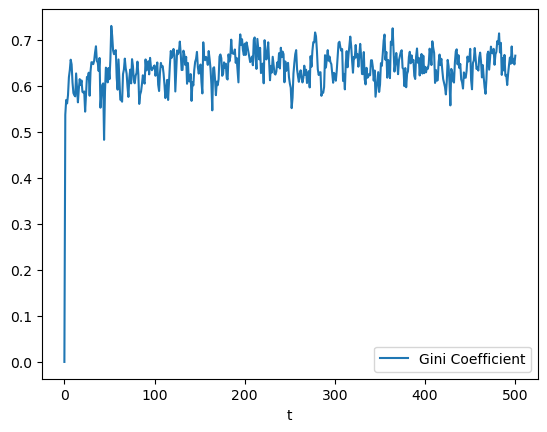

In [24]:
# We can also visualize the data using Pandas own methods.
data = results.variables.WealthModel
ax = data.plot()

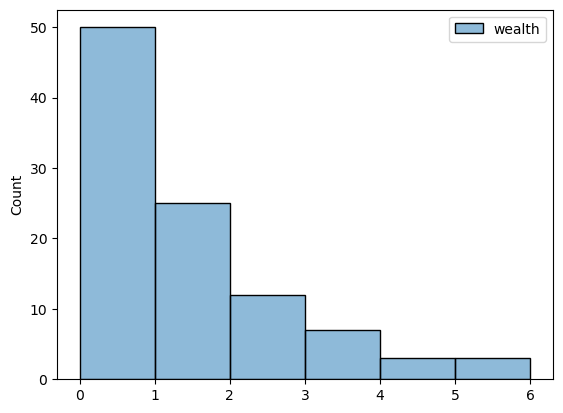

In [25]:
# We can visualize the distribution of wealth at the end of the simulation using Seaborn.
ax = sns.histplot(
    data = results.variables.WealthAgent,
    binwidth = 1
)